### Testing The Model

In [1]:
#importing Lobraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Loading Model
model = tf.keras.models.load_model( '/kaggle/input/potato_leaf_disease_classifier_95acc/keras/default/1/potato_accuracy95.keras')

In [3]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,370,683 (89.15 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,580,456 (59.43 MB)

**Visualizing Single Image from TEST SET**

In [5]:
!pip install opencv-python

In [6]:
import cv2

In [9]:
image_path = '/kaggle/input/potato-plant-dataset/potato_dataset/test/potato_healthy_5.JPG'

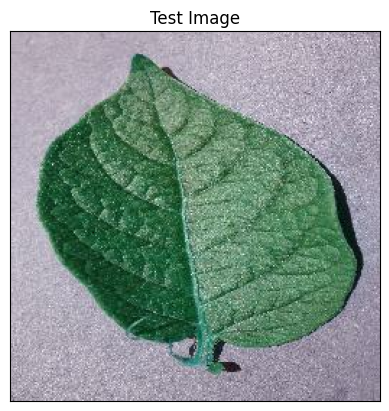

In [10]:
#image visualization
img = cv2.imread(image_path)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.imshow(img)

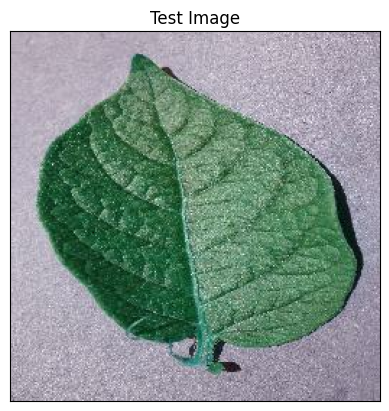

In [12]:
# convert the original image to rgb

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.imshow(img)

**Testing model**


In [14]:
#preprocessing the image as per the model specification
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [15]:
input_arr = np.array([input_arr]) #convert single image to a batch

In [16]:
input_arr

array([[[[186., 173., 183.],
         [185., 172., 182.],
         [186., 173., 183.],
         ...,
         [166., 150., 160.],
         [155., 139., 149.],
         [177., 161., 171.]],

        [[189., 176., 186.],
         [191., 178., 188.],
         [186., 173., 183.],
         ...,
         [150., 134., 144.],
         [171., 155., 165.],
         [158., 142., 152.]],

        [[185., 172., 182.],
         [190., 177., 187.],
         [187., 174., 184.],
         ...,
         [166., 150., 160.],
         [185., 169., 179.],
         [199., 183., 193.]],

        ...,

        [[178., 165., 172.],
         [179., 166., 173.],
         [154., 141., 148.],
         ...,
         [128., 111., 119.],
         [149., 132., 140.],
         [155., 138., 146.]],

        [[143., 130., 137.],
         [129., 116., 123.],
         [170., 157., 164.],
         ...,
         [127., 110., 118.],
         [155., 138., 146.],
         [141., 124., 132.]],

        [[158., 145., 152.],
       

In [17]:
print(input_arr.shape)

(1, 128, 128, 3)


In [18]:
#predicting
prediction =  model.predict(input_arr)
prediction.shape

I0000 00:00:1732110994.120786      74 service.cc:145] XLA service 0x78fa74003e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732110994.120855      74 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1732110995.748455      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(1, 3)

In [19]:
prediction

array([[3.6384683e-04, 2.7149698e-09, 9.9963617e-01]], dtype=float32)

In [20]:
result_index = np.argmax(prediction)

In [21]:
result_index

2

In [23]:
class_name= ['Potato_Late_blight', 'Potato__Early_blight', 'Potato__Healthy']

In [24]:
model_prediction =  class_name[result_index]
model_prediction

'Potato__Healthy'

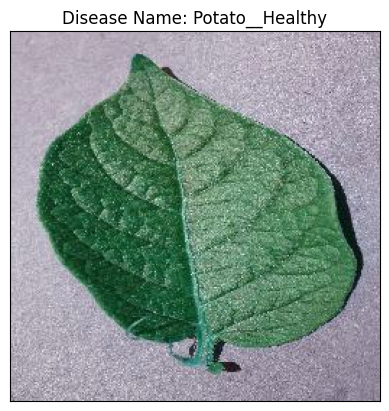

In [25]:
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.imshow(img)